In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

k = 167
density = 2770
Cp = 896

alfa = k/(density*Cp)

radius = (0.025/2)
height = 0.06018 

A_s = 2*np.pi*radius*height
volume = np.pi * radius**2 * height
mass = density * volume

def anal_h(Ti,Tinf,t,h):
    height = 0.06018 #m
    radius = (0.025/2) #m
    rho = 2770 #kg/m3
    Volume = np.pi * radius**2 * height #m3
    Cp = 896 #J/(kgK)
    As = 2*np.pi*radius*height #m2
    tau = (rho*Volume*Cp)/(h*As)
    #t = float(t)
    T = ((Ti-Tinf)*np.exp(-t/tau)) + Tinf 
    return T

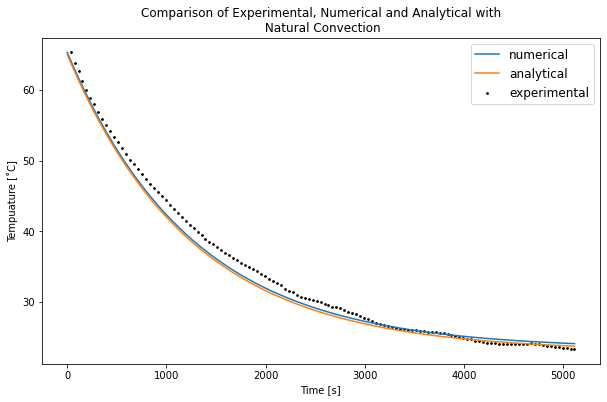

In [40]:
FC2_file = 'Natural Convection.csv'
raw_data_FC2 = pd.read_csv(FC2_file,header=6)
raw_data_FC2 = raw_data_FC2.iloc[::8,:]
raw_array_FC2 = np.array(raw_data_FC2)

exp_time = raw_array_FC2[:,0]*5 - 1
cylinder_T = raw_array_FC2[:,2]
ambient_T = raw_array_FC2[:,3]


time = exp_time.max() 
ic = cylinder_T.max() 

T_ambient = np.mean(ambient_T)

dr = 0.002
dt = 0.0295

x_steps = np.arange(0,radius,step=dr)
t_steps = np.arange(0,time,step=dt)

n_x = len(x_steps)
n_t = len(t_steps)

s = alfa * dt/dr**2
if (s>0.5):
    print('Bad things will happen')
    
h = 12.316525945573712  
    
BC2 = 0 

T = np.zeros((n_t,n_x))
T[0] = ic

for m in range(1,n_t):
    for i in range(1,n_x-1):
        a_i = s - s/(2*i)
        b_i = 1 - 2*s
        c_i = s + s/(2*i)
        
        T[m,i] = a_i * T[m-1,i-1] + b_i * T[m-1,i] + c_i * T[m-1,i+1]
        
        T[m,0] = T[m,1]
        
        H = -h * A_s *dt/(mass*Cp)
        T[m,-1] = H*(T[m-1,-1] - T_ambient) + T[m-1,-1]
        
        

NC_anal = anal_h(65,23,t_steps,h)

plt.figure(figsize=(10,6))
plt.plot(t_steps,T[:,0],label='numerical')
plt.scatter(exp_time,cylinder_T,s=3,color='k',label='experimental')
plt.xlabel("Time [s]")
plt.ylabel("Tempuature [˚C]")
plt.title("Comparison of Experimental, Numerical and Analytical with\n Natural Convection")
plt.plot(t_steps,NC_anal,label='analytical')
plt.legend(loc='upper right',fontsize='12')
plt.show()

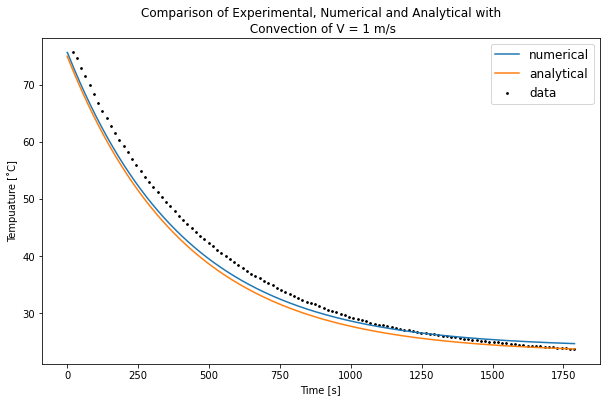

In [45]:
FC2_file = 'V 1ms.csv'
raw_data_FC2 = pd.read_csv(FC2_file,header=6)
raw_data_FC2 = raw_data_FC2.iloc[::3,:]
raw_array_FC2 = np.array(raw_data_FC2)

exp_time = raw_array_FC2[:,0]*5 - 1
cylinder_T = raw_array_FC2[:,2]
ambient_T = raw_array_FC2[:,3]


time = exp_time.max() 
ic = cylinder_T.max() 

T_ambient = np.mean(ambient_T)

dr = 0.002
dt = 0.0295

x_steps = np.arange(0,radius,step=dr)
t_steps = np.arange(0,time,step=dt)

n_x = len(x_steps)
n_t = len(t_steps)

s = alfa * dt/dr**2
if (s>0.5):
    print('Bad things will happen')
    
h = 37.3624000449915 
    
BC2 = 0 

T = np.zeros((n_t,n_x))
T[0] = ic

for m in range(1,n_t):
    for i in range(1,n_x-1):
        a_i = s - s/(2*i)
        b_i = 1 - 2*s
        c_i = s + s/(2*i)
        
        T[m,i] = a_i * T[m-1,i-1] + b_i * T[m-1,i] + c_i * T[m-1,i+1]
        
        T[m,0] = T[m,1]
        
        H = -h * A_s *dt/(mass*Cp)
        T[m,-1] = H*(T[m-1,-1] - T_ambient) + T[m-1,-1]

        
FC1_anal = anal_h(75,23,t_steps,h)
        
plt.figure(figsize=(10,6))
plt.plot(t_steps,T[:,0],label='numerical')
plt.scatter(exp_time,cylinder_T,s=3,color='k',label='data')
plt.plot(t_steps,FC1_anal,label='analytical')
plt.xlabel("Time [s]")
plt.ylabel("Tempuature [˚C]")
plt.title("Comparison of Experimental, Numerical and Analytical with\n Convection of V = 1 m/s")
plt.legend(loc='upper right',fontsize='12')
plt.show()

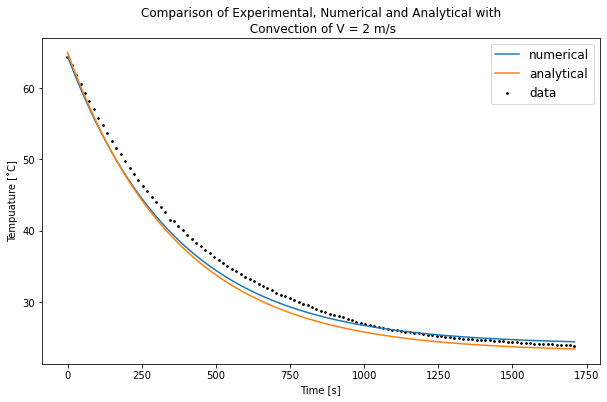

In [43]:
FC2_file = 'V 2ms.csv'
raw_data_FC2 = pd.read_csv(FC2_file,header=6)
raw_data_FC2 = raw_data_FC2.iloc[::3,:]
raw_array_FC2 = np.array(raw_data_FC2)

exp_time = raw_array_FC2[:,0]*5 - 1
cylinder_T = raw_array_FC2[:,2]
ambient_T = raw_array_FC2[:,3]


time = exp_time.max() 
ic = cylinder_T.max() 

T_ambient = np.mean(ambient_T)

dr = 0.002
dt = 0.0295

x_steps = np.arange(0,radius,step=dr)
t_steps = np.arange(0,time,step=dt)

n_x = len(x_steps)
n_t = len(t_steps)

s = alfa * dt/dr**2
if (s>0.5):
    print('Bad things will happen')
    
h = 42.12058944475348
    
BC2 = 0 

T = np.zeros((n_t,n_x))
T[0] = ic

for m in range(1,n_t):
    for i in range(1,n_x-1):
        a_i = s - s/(2*i)
        b_i = 1 - 2*s
        c_i = s + s/(2*i)
        
        T[m,i] = a_i * T[m-1,i-1] + b_i * T[m-1,i] + c_i * T[m-1,i+1]
        
        T[m,0] = T[m,1]
        
        H = -h * A_s *dt/(mass*Cp)
        T[m,-1] = H*(T[m-1,-1] - T_ambient) + T[m-1,-1]
        
FC2_anal = anal_h(65,23,t_steps,h)

plt.figure(figsize=(10,6))
plt.plot(t_steps,T[:,0],label='numerical')
plt.scatter(exp_time,cylinder_T,s=3,color='k',label='data')
plt.plot(t_steps,FC2_anal,label='analytical')
plt.xlabel("Time [s]")
plt.ylabel("Tempuature [˚C]")
plt.title("Comparison of Experimental, Numerical and Analytical with\n Convection of V = 2 m/s")
plt.legend(loc='upper right',fontsize='12')
plt.show()